# 计算流量

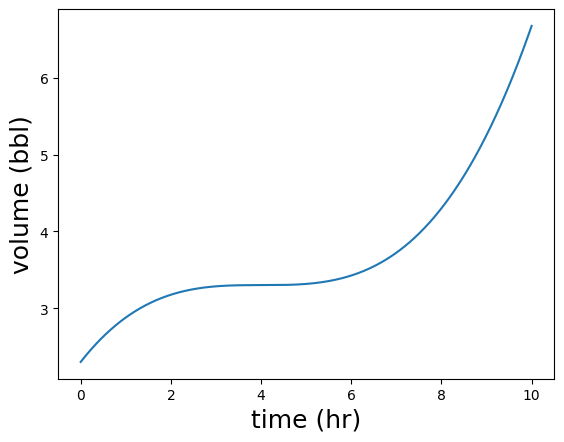

In [1]:
from py_lib.flow_rate import plot_volume, volume, plot_function

plot_volume(volume, 0, 10)

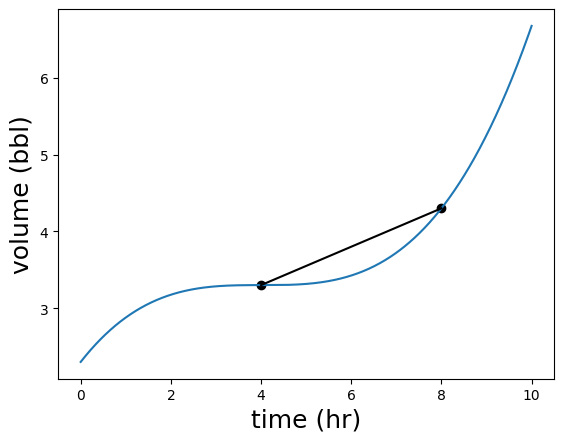

In [2]:
from py_lib.flow_rate import plot_secant

plot_volume(volume, 0, 10)
plot_secant(volume, 4, 8)

In [3]:
def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1)) / (t2 - t1)


print(f'4 到 8 小时的平均流量为：{average_flow_rate(volume, 4, 8)}')

4 到 8 小时的平均流量为：0.25


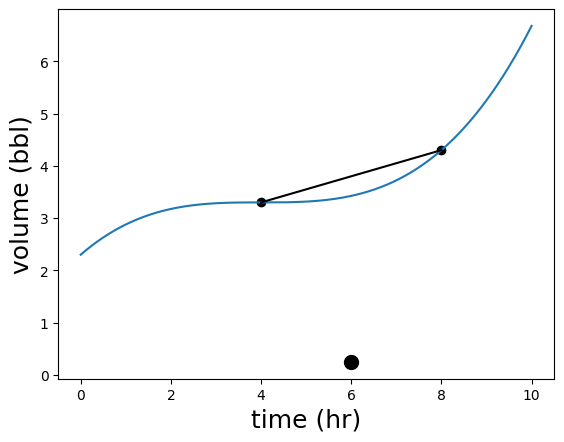

In [4]:
from py_lib.flow_rate import plot_points

plot_volume(volume, 0, 10)
plot_secant(volume, 4, 8)
plot_points([(6, average_flow_rate(volume, 4, 8))])

以固定间隔计算平均流量，并绘制流速图。

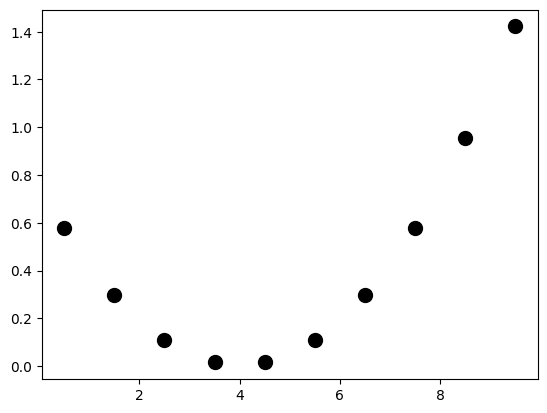

In [5]:
def plot_interval_flow_rates(v, interval, start, end):
    for i in range(start, end, interval):
        plot_points([(i + interval / 2, average_flow_rate(v, i, i + interval))])


# plot_volume(volume, 0, 10)
plot_interval_flow_rates(volume, 1, 0, 10)

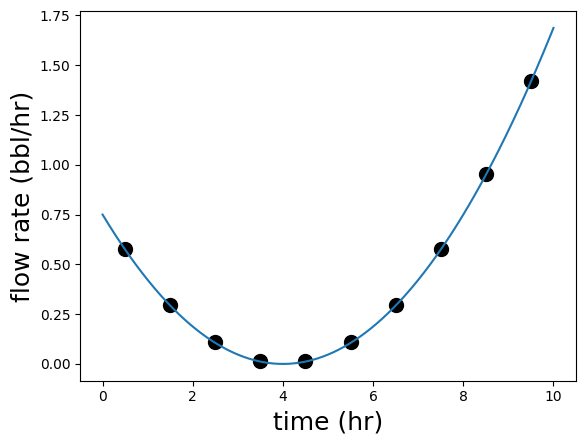

In [6]:
from py_lib.flow_rate import plot_flow_rate, flow_rate

plot_flow_rate(flow_rate, 0, 10)
plot_interval_flow_rates(volume, 1, 0, 10)

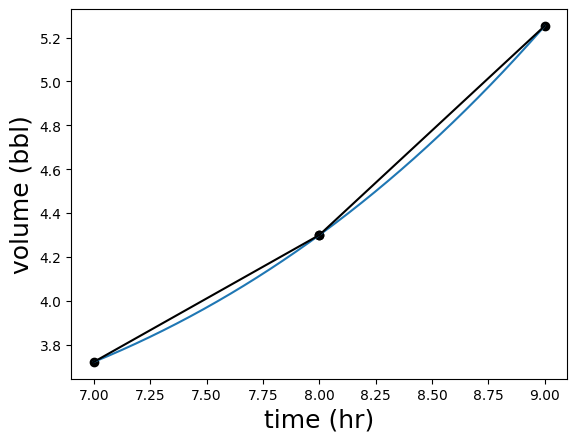

In [7]:
plot_volume(volume, 7, 9)
plot_secant(volume, 7, 8)
plot_secant(volume, 8, 9)

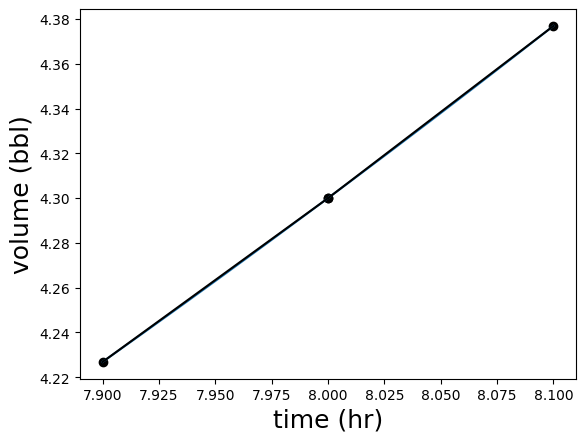

In [8]:
plot_volume(volume, 7.9, 8.1)
plot_secant(volume, 7.9, 8)
plot_secant(volume, 8, 8.1)

In [9]:
print(f'间距 0.1 平均流速：{average_flow_rate(volume, 7.9, 8.1)}')
print(f'间距 0.01 平均流速：{average_flow_rate(volume, 7.999, 8.001)}')
print(f'间距 0.001 平均流速：{average_flow_rate(volume, 7.9999, 8.0001)}')
print(f'间距 0.0001 平均流速：{average_flow_rate(volume, 7.99999, 8.00001)}')
print(f'间距 0.00001 平均流速：{average_flow_rate(volume, 7.999999, 8.000001)}')

间距 0.1 平均流速：0.7501562500000007
间距 0.01 平均流速：0.7500000156249458
间距 0.001 平均流速：0.7500000001554312
间距 0.0001 平均流速：0.75
间距 0.00001 平均流速：0.7500000001110223


In [10]:
def instantaneous_flow_rate(v, t, digits=6):
    tolerance = 10 ** (-digits)  # 如果两个数相差小于容差（tolerance）10-d，那么它们精确到小数点后d位是相同的
    h = 1
    approx = average_flow_rate(v, t - h, t + h)  # 首先计算目标点t 两侧h = 1个单位间隔上的割线斜率
    for i in range(0, 2 * digits):  # 作为一个粗略的近似值，我们在两次迭代之后放弃继续计算
        h = h / 10
        next_approx = average_flow_rate(v, t - h, t + h)  # 在每一步，将围绕点t的间隔缩小10倍，并计算这个新间隔内割线的斜率
        if abs(next_approx - approx) < tolerance:
            return round(next_approx, digits)  # 如果最后两个近似值相差小于容差，则将四舍五入后的结果返回
        else:
            approx = next_approx  # 否则，以更小的间隔再次进行循环
    raise Exception("Derivative did not converge")  # 如果超过了最大的迭代次数，就表示程序没有收敛到一个结果


print(f'在 8 小时时的瞬时流速为：{instantaneous_flow_rate(volume, 8)}')

在 8 小时时的瞬时流速为：0.75


In [11]:
def get_flow_rate_function(v):
    def flow_rate_function(t):
        return instantaneous_flow_rate(v, t)

    return flow_rate_function

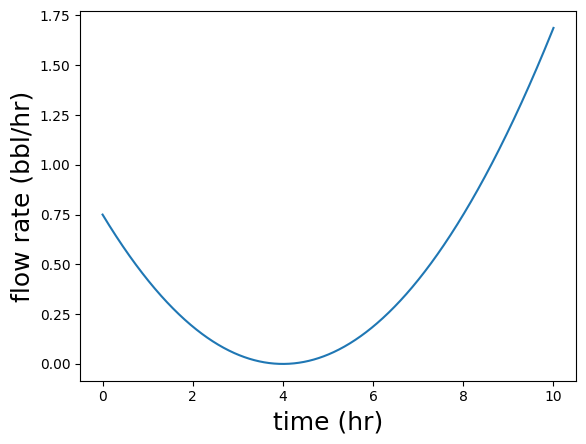

In [12]:
from py_lib.flow_rate import plot_flow_rate

plot_flow_rate(get_flow_rate_function(volume), 0, 10)

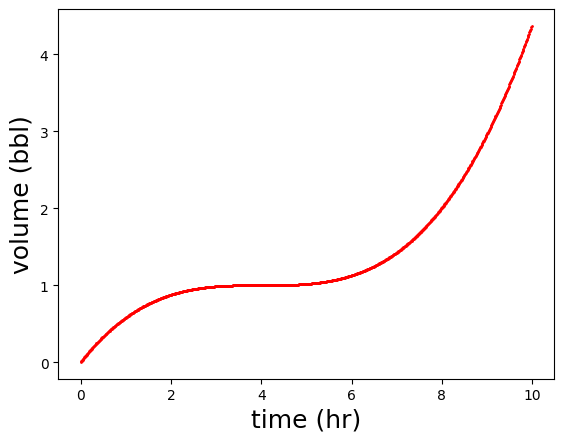

In [13]:
def small_volume_change(q, t, dt):
    return q(t) * dt


class _:
    current_volume = 0
    points = []
    for i in range(0, 10 * 100):
        current_volume += small_volume_change(flow_rate, i / 100, 0.01)
        points.append((i / 100, current_volume))
    plot_points(points=points, color='red', point_size=1, tlabel='time (hr)', xlabel='volume (bbl)')